In [ ]:
# Import Libraries Needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy import inf
import xgboost as xgb
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset

x: The independent variables  
y: The dependent variable (Target)

In [ ]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(data = boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Concatenate the dataframes for usage later.

In [ ]:
boston_full = pd.DataFrame(data = (boston.data), columns = columns)
boston_target = pd.DataFrame(data = (boston.target), columns = ["MEDV"])
boston_full = pd.concat([boston_full , boston_target], axis = 1)
boston_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Find Outliers using visualizations

One interesting approach to find out outliers is to visualize the data using different visualization techniques, which gives an initial look into these peculiar data points. Some of the techniques used are:
 - Box plots
 - Scatter plots
 - Data distribution

### Boxplot

The first approach we will look at, is using a boxplot.

A boxplot is a way to visualize data using a 5 number summery:
 - Median
 - Q1
 - Q3
 - Minimum
 - Maximum

 <img src=https://www.simplypsychology.org/boxplot.jpg width="400">

In [ ]:
def boxplot_summery(nums):
  ex_q1     = np.percentile(nums, 25)
  ex_median = np.percentile(nums, 50)
  ex_q3     = np.percentile(nums, 75)
  ex_iqr    = ex_q3 - ex_q1
  ex_min    = ex_q1 - 1.5 * ex_iqr
  ex_max    = ex_q3 + 1.5 * ex_iqr

  print(nums)
  print(f"Min = {ex_min}   Q1 = {ex_q1}   Median = {ex_median}   Q3 = {ex_q3}   Max = {ex_max}   IQR = {ex_iqr}")

In [ ]:
nums = np.arange(1, 11)

boxplot_summery(nums)

[ 1  2  3  4  5  6  7  8  9 10]
Min = -3.5   Q1 = 3.25   Median = 5.5   Q3 = 7.75   Max = 14.5   IQR = 4.5


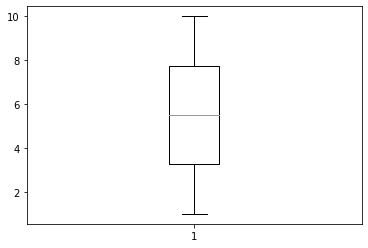

In [ ]:
plt.boxplot(nums);

[ 1  2  3  4  5  6  7  8  9 10 15 25]
Min = -4.5   Q1 = 3.75   Median = 6.5   Q3 = 9.25   Max = 17.5   IQR = 5.5


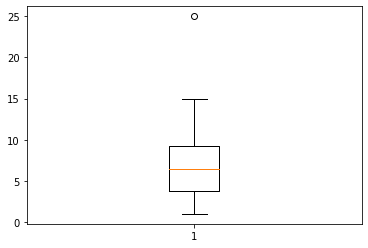

In [ ]:
# Add an outlier
nums = np.append(nums, 15)
nums = np.append(nums, 25)

boxplot_summery(nums)
plt.boxplot(nums);

Now back to our boston dataset, Lets look at the boxplot for the `DIS` column as a univariate analysis & we will be using seaborn (cause why not).

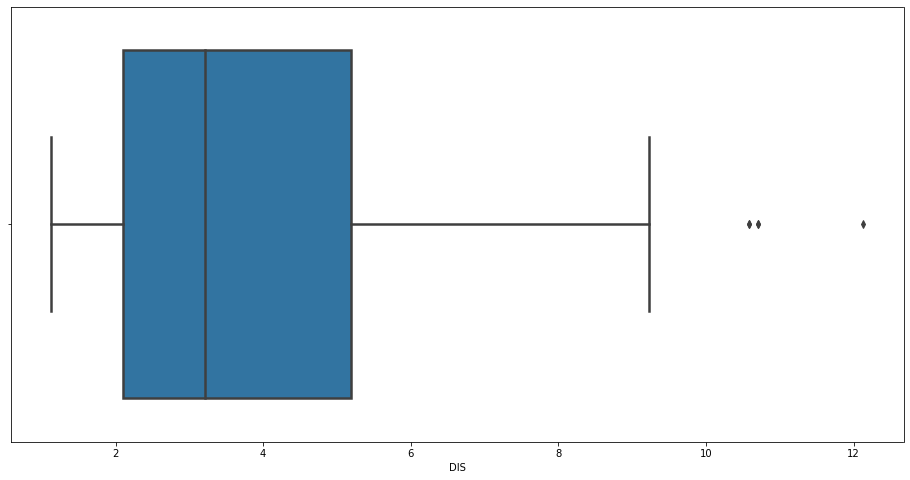

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(boston_df['DIS'], ax = ax, linewidth=2.5)

### Scatter plots

The next technique for visualizing the data and looking for outliers, is using the loyal fellow (scatter plots) and we are basically plotting the points and looking for points that seem far from the remaining cluster of points or not going in the same pattern.

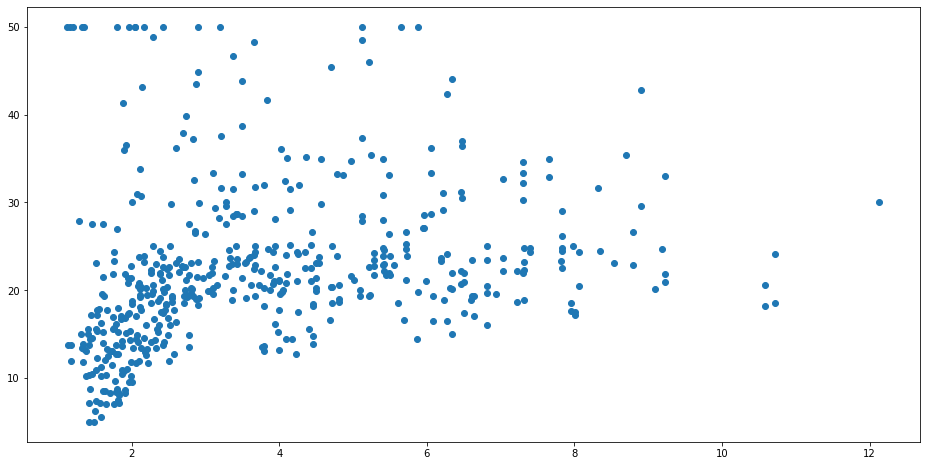

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x = boston_df['DIS'], y =  y)
plt.show()

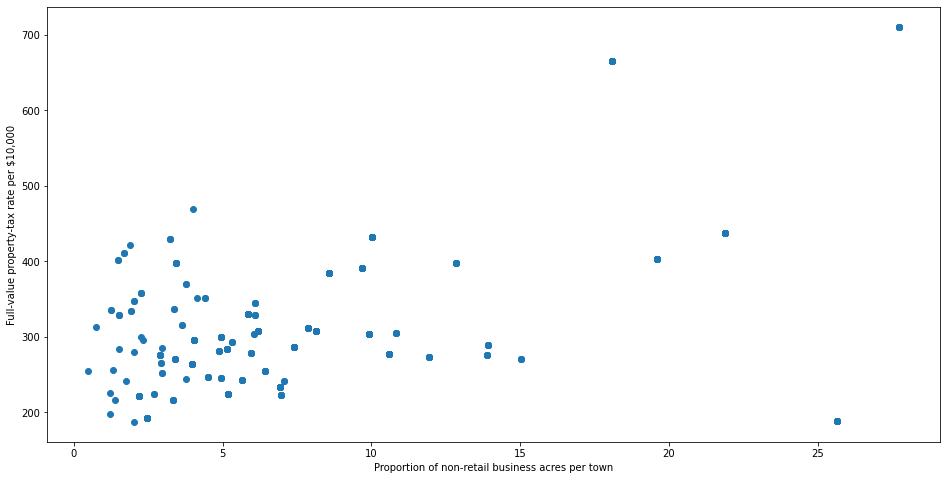

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

## Find Outliers using numerically

Now as we have seen in the visualization approach, that we can see the outliers, but we can not know by just looking at them, which ones are they exactly. 

Additionally, imagine you have a dataframe with dozen records & features, then just visualizing each is really tedious.


Thus, some of the ways to find outliers numerically that we are going to explore are:
 - Z-score
 - IQR score

### Z-score

As we have gone through this method in the normalization part, we are going to transform the datapoints to the standerdized value.

But firstly lets look at the distribution of the data:

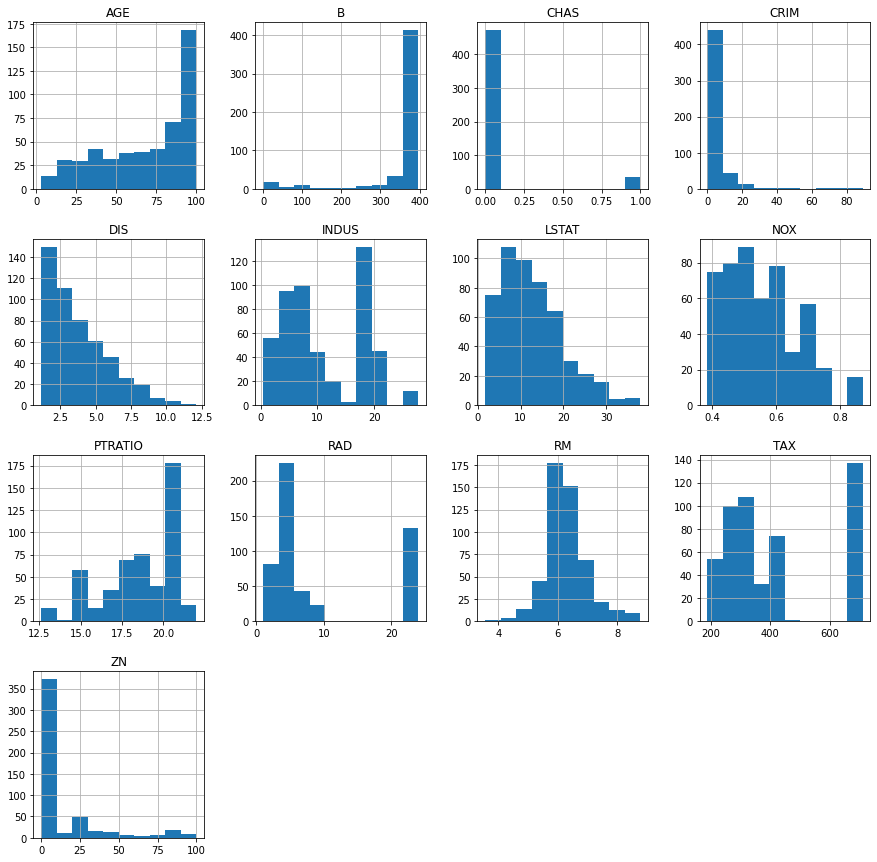

In [ ]:
boston_df.hist(figsize= (15, 15));

Now lets transform the dataframe by making the mean = 0 & std = 1.

In [ ]:
z_scores = stats.zscore(boston_df)

boston_stand = pd.DataFrame(data = z_scores, columns = boston_df.columns)
boston_stand.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Lets take another look at the distribution after the standerdization

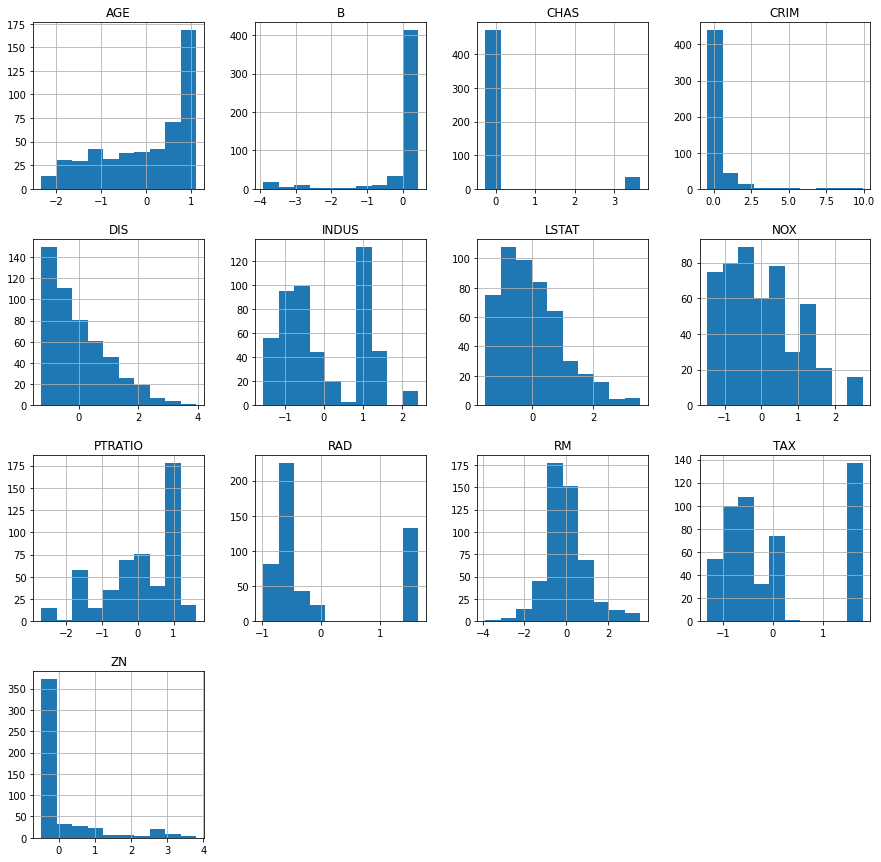

In [ ]:
boston_stand.hist(figsize=(15, 15));

In [ ]:
threshold = 3
mask = (boston_stand < -3) | (boston_stand > 3)
display(np.where(mask))


(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

### IQR (Inter-Quartile Range)

''
In descriptive statistics, the interquartile range (IQR), also called the midspread, middle 50%, or H‑spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles''
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png width="500">



In [ ]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [ ]:
(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


### Preparing our data with the Z-score, IQR and no technique for machine learning

In [ ]:
z = np.abs(stats.zscore(boston_df))
boston_df_o1 = boston_full[(z < 3).all(axis=1)]
boston_df_o1.shape

(415, 14)

In [ ]:
boston_df_o2 = boston_full[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_o2.shape

(274, 14)

In [ ]:
train_1, test_1 = train_test_split(boston_df_o1, test_size=0.2, random_state = 42) # using z score
train_2, test_2 = train_test_split(boston_df_o2, test_size=0.2, random_state = 42) # IQR score
train_3, test_3 = train_test_split(boston_full, test_size=0.2, random_state = 42) # Default

x1= train_1.iloc[:,:-1]
x2= train_2.iloc[:,:-1]
x3= train_3.iloc[:,:-1]
y1= train_1.iloc[:, 13]
y2= train_2.iloc[:, 13]
y3= train_3.iloc[:, 13]

xt1= test_1.iloc[:,:-1]
xt2= test_2.iloc[:,:-1]
xt3= test_3.iloc[:,:-1]
yt1= test_1.iloc[:, 13]
yt2= test_2.iloc[:, 13]
yt3= test_3.iloc[:, 13]

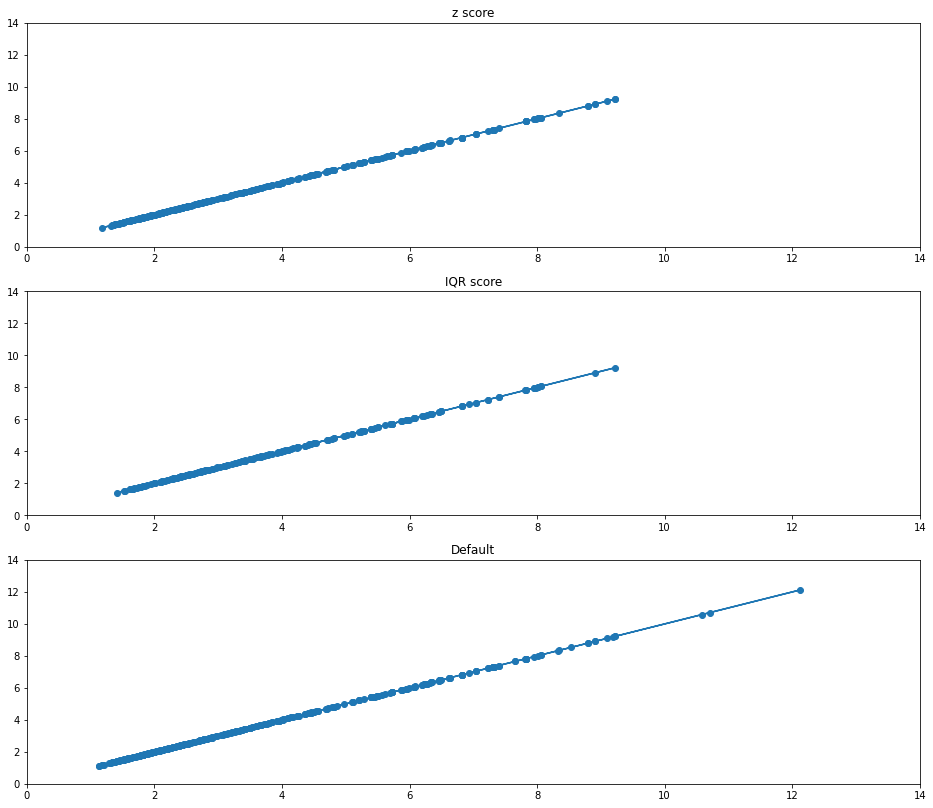

In [ ]:
fig, axs = plt.subplots(3, figsize=(16,14))
axs[0].scatter(x1.DIS, x1.DIS);
axs[0].plot(x1.DIS, x1.DIS);
axs[0].set_title("z score")
axs[1].scatter(x2.DIS, x2.DIS);
axs[1].plot(x2.DIS, x2.DIS);
axs[1].set_title("IQR score")
axs[2].scatter(x3.DIS, x3.DIS);
axs[2].plot(x3.DIS, x3.DIS);
axs[2].set_title("Default")
plt.setp(axs, xlim=(0, 14), ylim=(0,14));

### Performing LinearRegression on our data

In [ ]:
reg_1 = LinearRegression(normalize= True).fit(x1,y1)
reg_2 = LinearRegression(normalize= True).fit(x2,y2)
reg_3 = LinearRegression(normalize= True).fit(x3,y3)

In [ ]:
print("using z score:", reg_1.score(xt1,yt1),)
print("IQR score:", reg_2.score(xt2,yt2),)
print("Default:", reg_3.score(xt3,yt3),)

using z score: 0.7761172997388444
IQR score: 0.4398704123520847
Default: 0.668759493535632


### Performing LinearRegression on the log of our data

Taking the log of our data simply reduces the range of our numbers and significantly reduces the value of outliers ![log](https://www.varsitytutors.com/assets/vt-hotmath-legacy/hotmath_help/topics/logarithmic-functions/log-function.gif)

In [ ]:
x1_log= np.log(x1)
x2_log= np.log(x2)
x3_log= np.log(x3)

x1_log[x1_log == -inf] = 0
x2_log[x2_log == -inf] = 0
x3_log[x3_log == -inf] = 0

xt1_log= np.log(xt1)
xt2_log= np.log(xt2)
xt3_log= np.log(xt3)

xt1_log[xt1_log == -inf] = 0
xt2_log[xt2_log == -inf] = 0
xt3_log[xt3_log == -inf] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


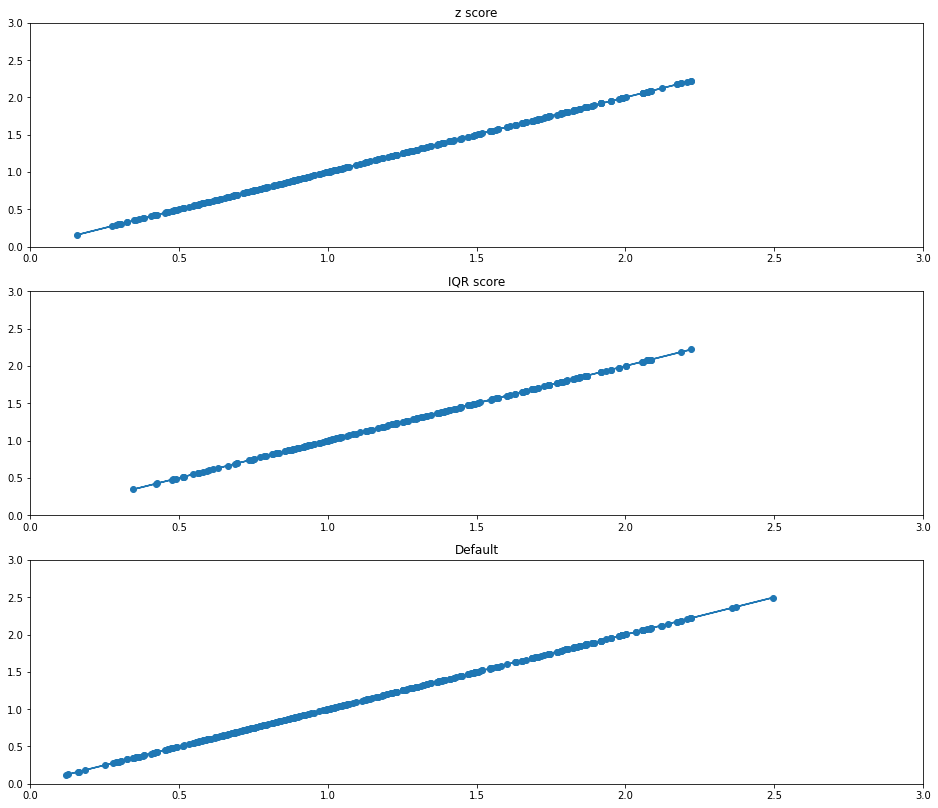

In [ ]:
fig, axs = plt.subplots(3, figsize=(16,14))
axs[0].scatter(x1_log.DIS, x1_log.DIS);
axs[0].plot(x1_log.DIS, x1_log.DIS);
axs[0].set_title("z score")
axs[1].scatter(x2_log.DIS, x2_log.DIS);
axs[1].plot(x2_log.DIS, x2_log.DIS);
axs[1].set_title("IQR score")
axs[2].scatter(x3_log.DIS, x3_log.DIS);
axs[2].plot(x3_log.DIS, x3_log.DIS);
axs[2].set_title("Default")
plt.setp(axs, xlim=(0, 3), ylim=(0,3));

In [ ]:
reg_1_log = LinearRegression().fit(x1_log,y1)
reg_2_log = LinearRegression().fit(x2_log,y2)
reg_3_log = LinearRegression().fit(x3_log,y3)

In [ ]:
print("using z score:", reg_1_log.score(xt1_log,yt1),)
print("IQR score:", reg_2_log.score(xt2_log,yt2),)
print("Default:", reg_3_log.score(xt3_log,yt3),)

using z score: 0.7941569916641643
IQR score: 0.5535316972037869
Default: 0.7493301983754046


### Now we explore a case where we use a model that already deals very good with default parameters and not so heavily processed data(gradient boosting regressor) 

We are going to try a SOTA machine learning model on our raw data (i.e without any type of filteration or normalization).
This is to simply show that pre-processing is in itself not the only factor that will determine the accuracy of our output.

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear') # SOTA 
xg_reg.fit(x3,y3)

[15:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print("Default:",xg_reg.score(xt3,yt3))

Default: 0.9009088645475026
